In [2]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------- ----- 786.4/920.8 kB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 8.7 MB/s eta 0:00:00


(None, None, None)

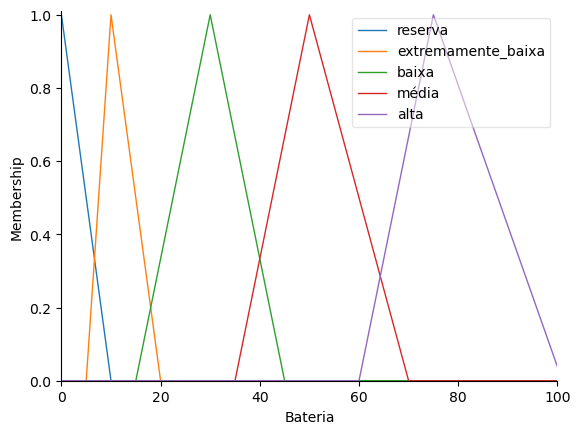

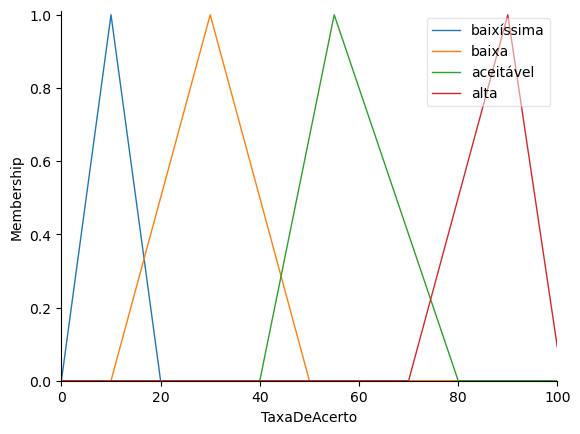

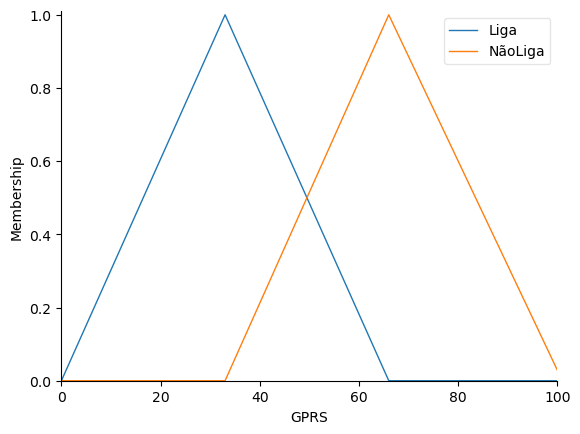

In [6]:
import skfuzzy as fuz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

universe = universe = np.linspace(0, 101, 5)

Bateria = ctrl.Antecedent(np.arange(0, 101, 1), 'Bateria')

Bateria['reserva'] = fuz.trimf(Bateria.universe, [0,0,10])
Bateria['extremamente_baixa'] = fuz.trimf(Bateria.universe, [5,10,20])
Bateria['baixa'] = fuz.trimf(Bateria.universe, [15,30,45])
Bateria['média'] = fuz.trimf(Bateria.universe, [35,50,70])
Bateria['alta'] = fuz.trimf(Bateria.universe, [60,75,101])

TaxaDeAcerto = ctrl.Antecedent(np.arange(0,101,1), 'TaxaDeAcerto')

TaxaDeAcerto['baixíssima'] = fuz.trimf(TaxaDeAcerto.universe, [0,10,20])
TaxaDeAcerto['baixa'] = fuz.trimf(TaxaDeAcerto.universe, [10,30,50])
TaxaDeAcerto['aceitável'] = fuz.trimf(TaxaDeAcerto.universe, [40,55,80])
TaxaDeAcerto['alta'] = fuz.trimf(TaxaDeAcerto.universe, [70,90,101])

GPRS = ctrl.Consequent(np.arange(0,101,1), 'GPRS')

GPRS['Liga'] = fuz.trimf(GPRS.universe, [0,33,66])
GPRS['NãoLiga'] = fuz.trimf(GPRS.universe, [33,66,101])

regras1_1 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['alta'], GPRS['NãoLiga'])
regras1_2 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['aceitável'], GPRS['NãoLiga'])
regras1_3 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
regras1_4 = ctrl.Rule(Bateria['reserva'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras2_1 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras2_2 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras2_3 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
regras2_4 = ctrl.Rule(Bateria['extremamente_baixa'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras3_1 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras3_2 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras3_3 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
regras3_4 = ctrl.Rule(Bateria['baixa'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras4_1 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras4_2 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras4_3 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['baixa'], GPRS['Liga'])
regras4_4 = ctrl.Rule(Bateria['média'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

regras5_1 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['alta'], GPRS['Liga'])
regras5_2 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['aceitável'], GPRS['Liga'])
regras5_3 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['baixa'], GPRS['Liga'])
regras5_4 = ctrl.Rule(Bateria['alta'] & TaxaDeAcerto['baixíssima'], GPRS['NãoLiga'])

# regras6_1 = ctrl.Rule(Bateria['alta'] | Bateria['média'] | Bateria['baixa'] | Bateria['extremamente_baixa'], GPRS['Liga'])
# regras6_2 = ctrl.Rule(Bateria['reserva'], GPRS['NãoLiga'])

# regras7_1 = ctrl.Rule(TaxaDeAcerto['baixíssima'] | TaxaDeAcerto['baixa'], GPRS['NãoLiga'])
# regras7_2 = ctrl.Rule(TaxaDeAcerto['aceitável'] | TaxaDeAcerto['alta'], GPRS['Liga'])

Bateria.view(), TaxaDeAcerto.view(), GPRS.view()

AttributeError: 'ControlSystemVisualizer' object has no attribute 'ctrl'

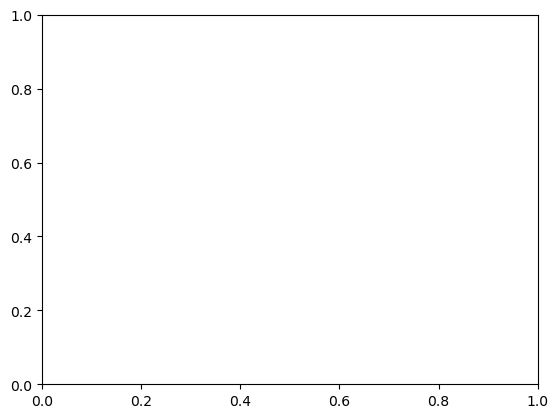

In [7]:
controlador = ctrl.ControlSystem([regras1_1,
                                  regras1_2,
                                  regras1_3,
                                  regras1_4,
                                  regras2_1,
                                  regras2_2,
                                  regras2_3,
                                  regras2_4,
                                  regras3_1,
                                  regras3_2,
                                  regras3_3,
                                  regras3_4,
                                  regras4_1,
                                  regras4_2,
                                  regras4_3,
                                  regras4_4,
                                  regras5_1,
                                  regras5_2,
                                  regras5_3,
                                  regras5_4])


GPRS_acionamento = ctrl.ControlSystemSimulation(controlador)
regras1_4.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

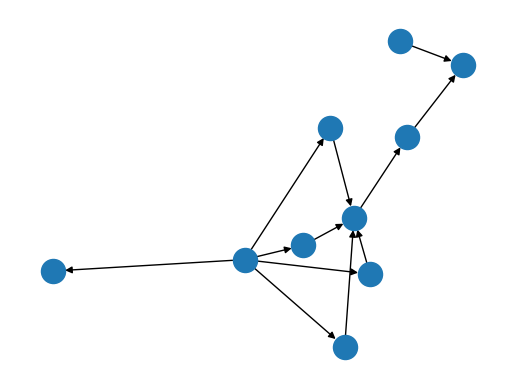

In [ ]:
regras6_1.view()

## Pertinência triangular x trapezoidal
Usando as funções de pertinência triangulares, alguns valores acambam sendo muito baixos, e outros nulos.

O problema de usarmos funções de pertinência triangulares é que isso aumenta o nível de incerteza do sistema, o único ponto de certeza absoluta seria o pico do triângulo (pertinência = 1.0). Por exemplo, quando a bateria está em 100%, o valor de pertinência será 0.01, pois 100% está no início da subida da função 'Bateria Alta'. Para que isso represente uma decisão que seria tomada corretamente, 100% deveria ter um valor de pertinência de 1.0 até que em 50% haja uma transição para bateria Baixa até em extremamente Baixa.

## Pertinência de Bateria

Para definir-mos quais os valores ideais de pertinência da **bateria**, é necessário compreender o problema em questão: Diminuir o consumo da bateria durante o upload de dados. Queremos que essa diminuição de consumo, aconteça desde o início (bateria alta) e que seja mais criterioso quando a bateria estiver **muito baixa** ou em **reserva**. Talvez então possamos definir um aumento de critério de **muito alto -> alto** menos abrubto do que **média -> baixa**
* Muito Alta e Alta: entre 100% e 50%
    * Muito Alta: 100 - 75%
    * Alta: 75 - 50 %
* Baixa e Muito Baixa: 50 - 15%
    * Baixa: 50 - 30%
    * Muito Baixa: 30 - 15%
* Reserva: 15 - 0% de bateria

A bateria na reserva não irá mais procurar sinal GPRS, para que a prioridade seja tentar enviar o sinal quando a qualidade estiver a mínima suficiente possível. Também, nesse tempo entre 15% e 0% de bateria, os pesquisadores irão procurar o sinal via triangulação usando o módulo GSM, mas nesse caso em específico, não temos o GSM.


## Pertinência de Taxa de Acerto

De outra forma, para definir-mos quais os valores ideais de pertinência da **taxa de acerto**, devemos saber quais os valores em que temos uma certeza absoluta para sucesso, e quais teremos para fracasso. A ideia principal era armazenar pontos de localização em que já foi feito algum envio ou tentativa de envio de dados e usar isso para definir uma taxa de acerto. Isso porque, como se trata de uma coleira de monitoramento animal, alguns deles tendem a andar ou voltar pelo caminho de onde vieram, e como apenas fatores temporais (chuva, nuvem, tempestade) afetariam a qualidade do sinal, outros fatores do ambiente (vegetação, profundidade) seriam os mesmos.

Porém, isso demandaria muito tempo, e além disso, existem diversos fatores não controláveis que poderiam interferir nessa lógica. O módulo SIM900 devolve alguns valores em relação ao sinal 2,5G e 3G que podem ser usados para definir quando ligar o gps para procurar o satélite e mandar a informação via pacote de dados (isso demanda um intervalo de tempo relativamente grande para o problema). O valor **+CSQ: \<rssi\>,\<ber\>** devolve informações sobre a qualidade do sinal, de acordo com o documento _CSQ-Commands-information_:
* RSSI: Força do sinal
    * 0 a 9: Sinal Muito Fraco/Marginal. Pode causar perda de pacotes, alta latência ou falha no envio de dados.
    * 10 a 14: Sinal Regular. Funciona para mensagens simples (SMS), mas pode ser instável para conexões GPRS/HTTP constantes.
    * 15 a 19: Sinal Bom. Nível recomendado para garantir que as informações sejam enviadas sem retransmissões frequentes.
    * 20 a 31: Sinal Excelente. Ideal para qualquer tipo de transmissão de dados.
    * 99: Sinal Desconhecido ou inexistente (módulo não encontrou rede ou antena desconectada).
* BER: _Bit error rate_ (taxa de erro de bits). Esse valor só é detectado durante a **transmissão de informações**. Portanto, não será usado para medir a qualidade do sinal antes de mandar informações.

Dessa forma, ao invés de **Taxa de Acerto** será usado uma **Qualidade do Sinal**, de acordo com as especificações acima.


(None, None, None)

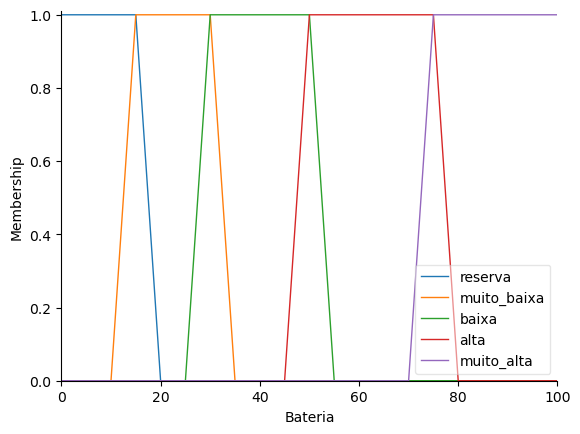

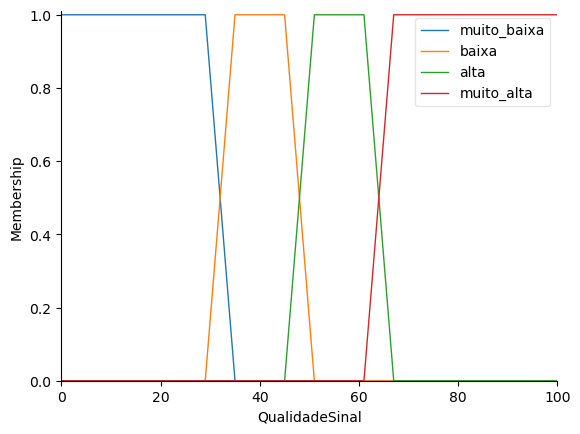

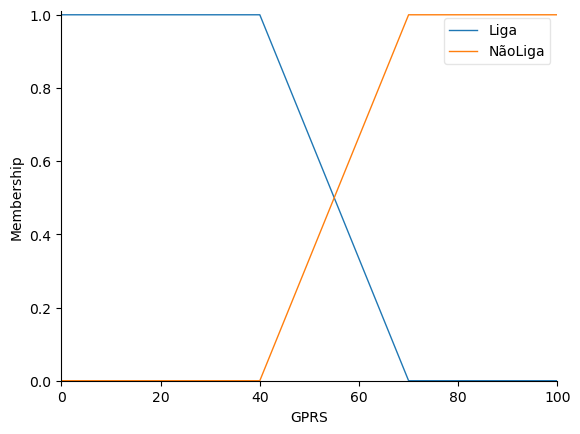

In [62]:
universe = universe = np.linspace(0, 101, 5)

Bateria = ctrl.Antecedent(np.arange(0, 101, 1), 'Bateria')

# Foi pensado que exista uma transição de 10% de bateria entre as funções de pertinencia. Será entre esses intervalos que o sistema irá realizar a decisão de qual pertinência se encaixa melhor.

# Retirou-se os "gaps" entre os platôs das funções de pertinência, para que o sistema possa realizar a inferência mesmo quando a bateria estiver em um valor intermediário entre as categorias, e não ser indeterminado.

# optou-se por aumentar a transição de bateria muito baixa para reserva pra 15% para que o sistema seja mais conservador, e não corra o risco de ligar o GPRS quando a bateria estiver em um nível crítico.

# Reserva: 15 - 0
Bateria['reserva'] = fuz.trapmf(Bateria.universe, [0,0,15,20])
# muito baixa: 30 - 15
Bateria['muito_baixa'] = fuz.trapmf(Bateria.universe, [10,15,30,35])
# baixa: 50 - 30
Bateria['baixa'] = fuz.trapmf(Bateria.universe, [25,30,50,55])
# alta: 75 - 50
Bateria['alta'] = fuz.trapmf(Bateria.universe, [45,50,75,80])
# muito alta: 100 - 75
Bateria['muito_alta'] = fuz.trapmf(Bateria.universe, [70,75,101,101])

QualidadeSinal = ctrl.Antecedent(np.arange(0,101,1), 'QualidadeSinal')

# Essa taxa deve ser normalizada para valores entre 0 e 100, tal que os valores entregues pelo SIM7020E são valores entre 0 e 31, e 99 quando indeterminado. O incerteza será de 2 pontos para mais ou para menos, ou seja, um valor de 15 pode ser considerado como 13, 14, 15, 16 ou 17. Nesse caso, não é certeza que o valores de pertinência se encaixe perfeitamente em uma categoria, pois o sinal irá mudar (o animal poderá continuar em movimento) e, além disso, não se é certeza que 2 pontos de incerteza sejam suficientes para cobrir a variação do sinal, mas é uma estimativa razoável para o sistema tomar decisões. 

# A formula de normalização é: (valor * 100) / 31

def nrm_tx(valor):
    return int((valor * 100) / 31)

# muito baixa: 0 a 9
QualidadeSinal['muito_baixa'] = fuz.trapmf(QualidadeSinal.universe, [0,0,nrm_tx(9),nrm_tx(11)])
# baixa: 10 a 14
QualidadeSinal['baixa'] = fuz.trapmf(QualidadeSinal.universe, [nrm_tx(9),nrm_tx(11),nrm_tx(14),nrm_tx(16)])
# alta: 15 a 19
QualidadeSinal['alta'] = fuz.trapmf(QualidadeSinal.universe, [nrm_tx(14),nrm_tx(16),nrm_tx(19),nrm_tx(21)])
# muito alta: 20 a 31
QualidadeSinal['muito_alta'] = fuz.trapmf(QualidadeSinal.universe, [nrm_tx(19),nrm_tx(21),100,100])

GPRS = ctrl.Consequent(np.arange(0,101,1), 'GPRS')

# A saída tem a especificação de que a transição entre as decisões seja mais suave, e que o grau de incerteza entre escolher ligar ou desligar seja maior, fazendo com que o sistema seja mais criterioso.

# foi definido um espaço de incerteza de 30 pontos, ou seja, nesse intervalo o sistema irá considerar que tanto ligar quanto não ligar são opções plausíveis, e irá tomar a decisão com base no grau de pertinência de cada categoria.

# Nesse caso, o desejo é que mais dados de posição sejam enviados, e que a exceção seja não enviar os dados. Portanto, a saída "Liga" tem um intervalo de pertinência maior, e a saída "NãoLiga" tem um intervalo de pertinência menor, para que o sistema seja mais propenso a ligar o GPRS do que a não ligar, mesmo quando os dados de entrada estiverem em um nível intermediário.

GPRS['Liga'] = fuz.trapmf(GPRS.universe, [0,0,40,70])
GPRS['NãoLiga'] = fuz.trapmf(GPRS.universe, [40,70,101,101])

regras1_1 = ctrl.Rule(Bateria['reserva'] & QualidadeSinal['muito_alta'], GPRS['NãoLiga'])
regras1_2 = ctrl.Rule(Bateria['reserva'] & QualidadeSinal['alta'], GPRS['NãoLiga'])
regras1_3 = ctrl.Rule(Bateria['reserva'] & QualidadeSinal['baixa'], GPRS['NãoLiga'])
regras1_4 = ctrl.Rule(Bateria['reserva'] & QualidadeSinal['muito_baixa'], GPRS['NãoLiga'])

regras2_1 = ctrl.Rule(Bateria['muito_baixa'] & QualidadeSinal['muito_alta'], GPRS['Liga'])
regras2_2 = ctrl.Rule(Bateria['muito_baixa'] & QualidadeSinal['alta'], GPRS['Liga'])
regras2_3 = ctrl.Rule(Bateria['muito_baixa'] & QualidadeSinal['baixa'], GPRS['NãoLiga'])
regras2_4 = ctrl.Rule(Bateria['muito_baixa'] & QualidadeSinal['muito_baixa'], GPRS['NãoLiga'])

regras3_1 = ctrl.Rule(Bateria['baixa'] & QualidadeSinal['muito_alta'], GPRS['Liga'])
regras3_2 = ctrl.Rule(Bateria['baixa'] & QualidadeSinal['alta'], GPRS['Liga'])
regras3_3 = ctrl.Rule(Bateria['baixa'] & QualidadeSinal['baixa'], GPRS['NãoLiga'])
regras3_4 = ctrl.Rule(Bateria['baixa'] & QualidadeSinal['muito_baixa'], GPRS['NãoLiga'])

regras4_1 = ctrl.Rule(Bateria['alta'] & QualidadeSinal['muito_alta'], GPRS['Liga'])
regras4_2 = ctrl.Rule(Bateria['alta'] & QualidadeSinal['alta'], GPRS['Liga'])
regras4_3 = ctrl.Rule(Bateria['alta'] & QualidadeSinal['baixa'], GPRS['Liga'])
regras4_4 = ctrl.Rule(Bateria['alta'] & QualidadeSinal['muito_baixa'], GPRS['NãoLiga'])

regras5_1 = ctrl.Rule(Bateria['muito_alta'] & QualidadeSinal['muito_alta'], GPRS['Liga'])
regras5_2 = ctrl.Rule(Bateria['muito_alta'] & QualidadeSinal['alta'], GPRS['Liga'])
regras5_3 = ctrl.Rule(Bateria['muito_alta'] & QualidadeSinal['baixa'], GPRS['Liga'])
regras5_4 = ctrl.Rule(Bateria['muito_alta'] & QualidadeSinal['muito_baixa'], GPRS['NãoLiga'])

Bateria.view(), QualidadeSinal.view(), GPRS.view()